In [1]:
import numpy as np
import pandas as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C:\Users\sudes\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sudes\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("mail_data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


1. There are total non-Null two columns: 

    **Category** - It says what type of Category the mail data was (spam or ham).

    **Message** - It says what were written on those emails.

2. There are total 5572 non-Null records.
3. Data type of all data are object.
4. It takes more than 87.2 KB memory space.
**Note:** 

**Spam** is a type of unsolicited bulk message sent electronically, usually for advertising purposes. **Ham**, on the other hand, is email that is generally desired and not considered spam

In [25]:
df.loc[df['Category'] == 'spam', 'Category', ] = 0
df.loc[df['Category'] == 'ham', 'Category', ] = 1

In [5]:
x = df['Message']
y = df['Category']

### Now we split the data set into testing and training

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

'test size = 0.3' means data divied into 70% training data and 30% testing data.

Setting random_state to an integer (e.g., random_state=42) acts as a seed for the random number generator used to shuffle the data before splitting it. You can use any integer for random_state. 42 is a popular choice, but any fixed value will work. 

A seed ensures that the sequence of random numbers generated is the same every time you run the code with the same seed value. This leads to consistent results, which is essential for debugging and comparing different models.

When splitting a data set splitting a node in a decision tree or a logistric regression analyzing centroid, is clustering takes place so that why we use randomness

In [66]:
print("Total records are ", x.shape)
print("Total train data are ", X_train.shape)
print("Total test data are ", X_test.shape)

Total records are  (5572,)
Total train data are  (3900,)
Total test data are  (1672,)


In [67]:
print("Total records are ", y.shape)
print("Total train data are ", Y_train.shape)
print("Total test data are ", Y_test.shape) 

Total records are  (5572,)
Total train data are  (3900,)
Total test data are  (1672,)


### Transform the text data to feature vectors:
Now, I will transform the text data to feature vectors that can be as input to logistic regression.

##### Feature Extraction:

In [68]:
# my_words = ['english', 'winner','prize']
# my_stop_words = x.ENGLISH_STOP_WORDS.union(my_words)


In [69]:
feature_extraction = TfidfVectorizer(min_df= 1, stop_words= 'english', lowercase= True)

X_train_feature_extraction = feature_extraction.fit_transform(X_train)
X_test_feature_extraction = feature_extraction.transform(X_test)

#### Convert Y_test and Y_train values as an integer:
I will convert Y_test and Y_train values as an integer. Because there are all values are in the form of an integer data type.

In [70]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [71]:
print("Feature accuracy for X_train data (Total:4457) ")
print(X_train_feature_extraction)

Feature accuracy for X_train data (Total:4457) 
  (0, 2221)	0.4595576461719437
  (0, 6907)	0.42057032296489166
  (0, 260)	0.3977642008852706
  (0, 943)	0.35285068394560465
  (0, 3629)	0.33392519134134463
  (0, 3634)	0.31674844532481095
  (0, 5025)	0.3425956765507876
  (1, 5087)	0.564752315585174
  (1, 4329)	0.4556948018194525
  (1, 6399)	0.6880385669683886
  (2, 5909)	0.4598907748288949
  (2, 1882)	0.5577039025555312
  (2, 5320)	0.407962240134966
  (2, 1557)	0.5577039025555312
  (3, 2032)	0.5517950786382567
  (3, 1762)	0.4550182724182232
  (3, 6157)	0.39464721758363247
  (3, 889)	0.4179976347325351
  (3, 5392)	0.3975073759914889
  (4, 3168)	0.517613431846439
  (4, 5675)	0.6128580677760653
  (4, 2864)	0.40046755880208973
  (4, 6864)	0.44283976592107693
  (5, 6369)	0.3834923635990344
  (5, 5884)	0.4325022650654002
  :	:
  (3895, 6835)	0.4724310616139888
  (3895, 6851)	0.3960620484148489
  (3895, 2277)	0.4500945571447008
  (3895, 2080)	0.26990881063254835
  (3895, 2891)	0.2286724629283105

#### Train the model:
With the help of Logistic Regression.

#### What is Logistic Regression?
Logistic Regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function.
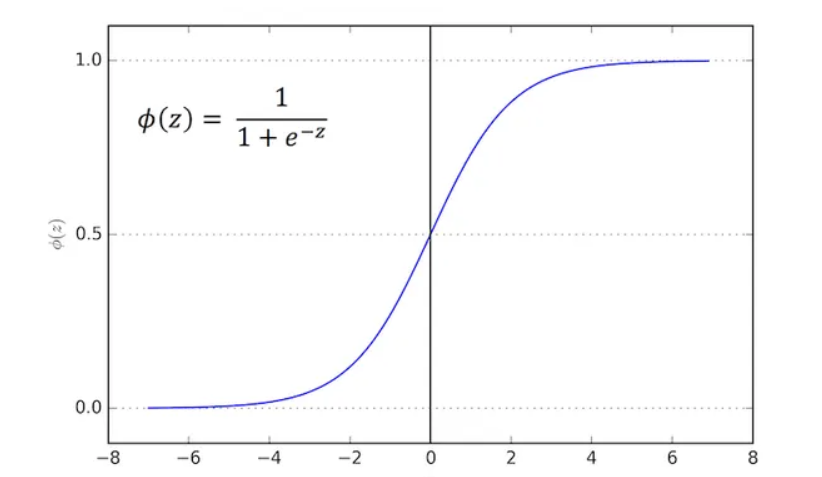
The formula mentioned in the above image is known as Logistic function or Sigmoid function and the curve called Sigmoid curve. The Sigmoid function gives an S shaped curve. The output of Sigmoid function tends towards 1 as z → ∞ and tends towards 0 as z → −∞. Hence Sigmoid/logistic function produces the value of dependent variable which will always lie between [0,1] i.e the probability of being in a class.

In [13]:
# Here I will train the logistic regression model with the train data
model = LogisticRegression()
model.fit(X_train_feature_extraction, Y_train)

LogisticRegression()

In [14]:
# Evaluating the training model and prediction of the traininng data
prediction_on_training_data = model.predict(X_train_feature_extraction)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

print('Accuracy on training data: ', accuracy_on_training_data)

Accuracy on training data:  0.9661207089970832


In [15]:
# Evaluating the testing data and prediction of the testing data
prediction_on_test_data = model.predict(X_test_feature_extraction)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

print('accuracy on test data: ', accuracy_on_test_data)

accuracy on test data:  0.967713004484305


**Note:** The accuracy on test data is almost same as the training data. So we can say that the model. 

Almost 97% correct.

#### Now we took an email and check spam or ham: 

In [16]:
input_your_mail = ['''
This is the 2nd time we have tried to contact u. 
U have won the 4000 prize. 
2 claim is easy, just call 014752452226532 NOW! Only 10p per minute. BT-national-rate''']

# CONVERT TEXT TO FEATURE VECTORS
input_data_features = feature_extraction.transform(input_your_mail)

# MAKING PREDICTION
prediction = model.predict(input_data_features)
if(prediction[0] == 1):
    print('Ham mail')
else:
    print('Spam mail')

Spam mail


In [17]:
input_your_mail = ['''Indian Penal Code, CrPC and Indian Evidence Act, which are more than 100 years old laws made by the British Parliament, have now been replaced by Bharatiya Nyaya Sanhita 2023, Bharatiya Nagrik Suraksha Sanhita 2023, Bharatiya Sakshya Adhiniyam 2023. These laws have come into force across the country from July 1, 2024. The concept of Indian justice has been restored by changing the colonial laws.

The featured cover story in the latest edition of New India Samachar (1-15 July, 2024) delves into the theme of ‘Citizen First Justice First’, which reflects the ‘New Era of Justice in India’. Special content on the beginning of the 18th Lok Sabha, the election of Lok Sabha Speaker, the President’s address are included in this issue.

For easy accessibility, the e-New India Samachar is now available in Hindi, English, and 11 other Indian languages. You can click on the link in your preferred language to explore the latest edition and stay informed about the dynamic developments shaping the nation.''']

# CONVERT TEXT TO FEATURE VECTORS
input_data_features = feature_extraction.transform(input_your_mail)

# MAKING PREDICTION
prediction = model.predict(input_data_features)
if(prediction[0] == 1):
    print('Ham mail')
else:
    print('Spam mail')

Ham mail


In [18]:
input_your_mail = ['Russia’s top honour for PM Modi & vibrant Moscow community event – Read in the newsletter! ']

# CONVERT TEXT TO FEATURE VECTORS
input_data_features = feature_extraction.transform(input_your_mail)

# MAKING PREDICTION
prediction = model.predict(input_data_features)
if(prediction[0] == 1):
    print('Ham mail')
else:
    print('Spam mail')

Ham mail


In [19]:
input_your_mail = ['Join LIVE for Mann Ki Baat, on 28th July at 11 AM']

# CONVERT TEXT TO FEATURE VECTORS
input_data_features = feature_extraction.transform(input_your_mail)

# MAKING PREDICTION
prediction = model.predict(input_data_features)
if(prediction[0] == 1):
    print('Ham mail')
else:
    print('Spam mail')

Ham mail


In [20]:
input_your_mail = ['BPR&D द्वारा प्रकाशित द्विभाषी पाक्षिक पत्रिका ‘सजग भारत’ एवं ‘Vigilant India’ ']

# CONVERT TEXT TO FEATURE VECTORS
input_data_features = feature_extraction.transform(input_your_mail)

# MAKING PREDICTION
prediction = model.predict(input_data_features)
if(prediction[0] == 1):
    print('Ham mail')
else:
    print('Spam mail')

Ham mail


In [21]:
input_your_mail = ['Here are the highlights from Mann Ki Baat Episode of June 2024']

# CONVERT TEXT TO FEATURE VECTORS
input_data_features = feature_extraction.transform(input_your_mail)

# MAKING PREDICTION
prediction = model.predict(input_data_features)
if(prediction[0] == 1):
    print('Ham mail')
else:
    print('Spam mail')

Ham mail


In [22]:
input_your_mail = ['SBI Life\'s Service touch points']

# CONVERT TEXT TO FEATURE VECTORS
input_data_features = feature_extraction.transform(input_your_mail)

# MAKING PREDICTION
prediction = model.predict(input_data_features)
if(prediction[0] == 1):
    print('Ham mail')
else:
    print('Spam mail')

Ham mail


In [23]:
input_your_mail = ['Government electronic Procurement your bid opening for the tender']

# CONVERT TEXT TO FEATURE VECTORS
input_data_features = feature_extraction.transform(input_your_mail)

# MAKING PREDICTION
prediction = model.predict(input_data_features)
if(prediction[0] == 1):
    print('Ham mail')
else:
    print('Spam mail')

Ham mail
